# EECS 731 Final Project - Clothing One
## Classification

In [1]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

### Display the Dataframes from the Pickles

In [3]:
reviews.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,137,590,4
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,132,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,138,310,2


In [4]:
rented_for_encoding.head()

,encoding
labels,
date,0
everyday,1
formal affair,2
other,3
party,4


In [5]:
body_type_encoding.head()

,encoding
labels,
apple,0
athletic,1
full bust,2
hourglass,3
pear,4


In [6]:
category_encoding.head()

,encoding
labels,
ballgown,0
blazer,1
blouse,2
blouson,3
bomber,4


In [7]:
#Necessary imports
from sklearn.ensemble import RandomForestClassifier #Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split # can split data into test test & train set
from sklearn import metrics # Can calculate how accurrate our model is
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

### Split the Dataset Into Training and Testing Data

In [8]:
# Remove fit, the target variable, and features that
# are only received after the item has been bought.
X = reviews.drop(['fit', 'rating', 'review_date'], axis=1)
Y = reviews['fit']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
84461,32,1,16,66.0,620288,4,8,699477,132,590,4
76724,30,6,20,64.0,125564,7,4,565624,115,310,2
52214,23,1,20,65.0,125564,2,12,903377,140,480,3
113062,23,2,45,61.0,963476,4,1,256614,120,590,6
85702,29,1,53,70.0,2007354,1,8,550942,135,480,3


### Classifier Models:
- Random Forest (10 estimators)
- Random Forest (100 estimators)
- Gradient Boosting
- Neural Network: Multilayer Perceptron

In [9]:
# Create classifers
rf10 = RandomForestClassifier(n_estimators=10)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(random_state=1, learning_rate=.1)
nn = MLPClassifier()

# Train Classifers
rf10 = rf10.fit(X_train, Y_train)
rf = rf.fit(X_train, Y_train)
gb = gb.fit(X_train, Y_train)
nn = nn.fit(X_train, Y_train)

#Predict the response for test dataset
rf10_y_pred = rf10.predict(X_test)
rf_y_pred = rf.predict(X_test)
gb_y_pred = gb.predict(X_test)
nn_y_pred = nn.predict(X_test)

print("Random Forest:")
print("10 estimators Training Accuracy:", metrics.accuracy_score(Y_train, rf10.predict(X_train)))
print("10 estimators Test Accuracy:",metrics.accuracy_score(Y_test, rf10_y_pred))
print("100 estimators Training Accuracy:", metrics.accuracy_score(Y_train, rf.predict(X_train)))
print("100 estimators Test Accuracy:",metrics.accuracy_score(Y_test, rf_y_pred))

print("\nGradient Boosting:")
print("Training Accuracy:", metrics.accuracy_score(Y_train, gb.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(Y_test, gb_y_pred))

print("\nNeural Network:")
print("Training Accuracy:", metrics.accuracy_score(Y_train, nn.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(Y_test, nn_y_pred))

Random Forest:
10 estimators Training Accuracy: 0.9735363437628092
10 estimators Test Accuracy: 0.7171499812139221
100 estimators Training Accuracy: 0.9999487634922803
100 estimators Test Accuracy: 0.7312566178228643

Gradient Boosting:
Training Accuracy: 0.7371225577264654
Test Accuracy: 0.7357652764969088

Neural Network:
Training Accuracy: 0.7360892881541194
Test Accuracy: 0.7355261809611641


What % of users rate the fit of the product as "fit" to see if either model gave us additional information

In [10]:
print("Fit   %:", ((reviews[reviews.fit == 'fit'].shape[0]) / (len(reviews.index))))
print("Small %:", ((reviews[reviews.fit == 'small'].shape[0]) / (len(reviews.index))))
print("Large %:", ((reviews[reviews.fit == 'large'].shape[0]) / (len(reviews.index))))

sizes = [reviews[reviews.fit == 'fit'].shape[0], reviews[reviews.fit == 'small'].shape[0], reviews[reviews.fit == 'large'].shape[0]]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Fit   %: 0.7359766636380405
Small %: 0.1340474515135161
Large %: 0.12997588484844344


<Figure size 640x480 with 1 Axes>

More information is gained simply by guessing "fit" on every item, so these models provide us no additional information.

In [11]:
import numpy as np
rfImportances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns =['importance']).sort_values('importance', ascending=False)
gbImportances = pd.DataFrame(gb.feature_importances_, index = X_train.columns, columns =['importance']).sort_values('importance', ascending=False)
rfImportances

,importance
item_id,0.202708
user_id,0.174375
age,0.122212
weight,0.102286
height,0.091276
rented_for,0.059895
size,0.053484
body_type,0.052332
bust_volume,0.051212
bust_height,0.050596


In [12]:
gbImportances

,importance
size,0.321014
item_id,0.218016
weight,0.205683
category,0.125788
rented_for,0.047647
age,0.022415
bust_volume,0.018113
body_type,0.017964
height,0.011069
user_id,0.009415


In [13]:
from sklearn.utils import resample
def resample_data(df):
    # Separate majority and minority classes
    df_majority = df[df.fit=='fit']
    df_minority_1 = df[df.fit=='small']
    df_minority_2 = df[df.fit=='large']

    size = df_majority.shape[0]
    
    # Upsample minority class
    df_minority_1_upsampled = resample(df_minority_1, 
                                     replace=True,     # sample with replacement
                                     n_samples=size,    # to match majority class
                                     random_state=123) # reproducible results
    
    df_minority_2_upsampled = resample(df_minority_2, 
                                     replace=True,     # sample with replacement
                                     n_samples=size,    # to match majority class
                                     random_state=123) # reproducible results
    # # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled]).sample(frac=1)

    return df_upsampled

In [14]:
X_train['fit'] = Y_train.values
X_test['fit'] = Y_test.values

In [15]:
X_train_resampled = resample_data(X_train)
X_test_resampled = resample_data(X_test)

In [16]:
Y_train_resampled = X_train_resampled['fit']
Y_test_resampled = X_test_resampled['fit']
X_train_resampled = X_train_resampled.drop(['fit'],axis = 1)
X_test_resampled = X_test_resampled.drop(['fit'], axis = 1)

In [17]:
def fit_to_int(x):
    if x == 'fit':
        return 0
    elif x == 'large':
        return 1
    return -1
Y_train_resampled = Y_train_resampled.map(fit_to_int)
Y_test_resampled = Y_test_resampled.map(fit_to_int)

### Display the Resampled Data

In [18]:
X_train_resampled.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
139023,46,3,20,64.0,709832,2,8,560032,125,480,3
66108,34,1,16,67.0,1920477,7,16,399987,140,480,4
47634,37,1,16,63.0,1859039,3,8,162274,117,390,2
138106,57,2,16,68.0,241019,7,35,365755,160,710,5
18893,37,2,20,65.0,1010926,2,25,394375,175,850,4


In [19]:
X_test_resampled.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
139812,37,2,26,67.0,2310753,7,13,181832,145,590,4
5665,45,1,20,69.0,1487216,7,13,177137,145,390,2
109420,43,1,16,69.0,628722,4,8,232235,130,390,3
145270,38,4,16,66.0,417055,7,8,675796,138,310,1
51592,43,4,20,68.0,1916198,2,17,893015,145,480,3


In [20]:
Y_train_resampled.head()

139023    0
66108    -1
47634     0
138106   -1
18893     1
Name: fit, dtype: int64

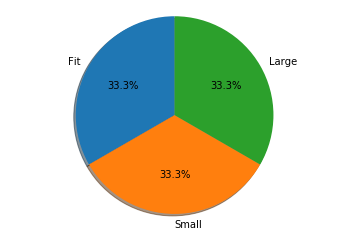

In [21]:
ytr = list(Y_train_resampled)
sizes = [len([x for x in ytr if x == 0]), len([x for x in ytr if x == -1]), len([x for x in ytr if x == 1])]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [22]:
Y_test_resampled.head()

139812    1
5665      0
109420    0
145270    1
51592     0
Name: fit, dtype: int64

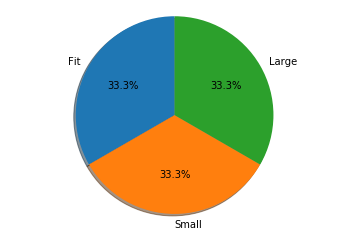

In [23]:
ytr = list(Y_test_resampled)
sizes = [len([x for x in ytr if x == 0]), len([x for x in ytr if x == -1]), len([x for x in ytr if x == 1])]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Classifier Models on Resampled Data:
- Random Forest (10 estimators)
- Random Forest (100 estimators)
- Gradient Boosting
- Neural Network: Multilayer Perceptron

In [24]:
# Create classifers
rf10 = RandomForestClassifier(n_estimators=10)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier()
nn = MLPClassifier()

# Train Classifers
rf10 = rf10.fit(X_train_resampled, Y_train_resampled)
rf = rf.fit(X_train_resampled, Y_train_resampled)
gb = gb.fit(X_train_resampled, Y_train_resampled)
nn = nn.fit(X_train_resampled, Y_train_resampled)

#Predict the response for test dataset
rf10_y_pred = rf10.predict(X_test_resampled)
rf_y_pred = rf.predict(X_test_resampled)
gb_y_pred = gb.predict(X_test_resampled)
nn_y_pred = nn.predict(X_test_resampled)

print("Random Forest:")
print("10 estimators Training Accuracy:", metrics.accuracy_score(Y_train_resampled, rf10.predict(X_train_resampled)))
print("10 estimators Test Accuracy:",metrics.accuracy_score(Y_test_resampled, rf10_y_pred))
print("100 estimators Training Accuracy:", metrics.accuracy_score(Y_train_resampled, rf.predict(X_train_resampled)))
print("100 estimators Test Accuracy:",metrics.accuracy_score(Y_test_resampled, rf_y_pred))

print("\nGradient Boosting:")
print("Training Accuracy:", metrics.accuracy_score(Y_train_resampled, gb.predict(X_train_resampled)))
print("Test Accuracy:",metrics.accuracy_score(Y_test_resampled, gb_y_pred))

print("\nNeural Network:")
print("Training Accuracy:", metrics.accuracy_score(Y_train_resampled, nn.predict(X_train_resampled)))
print("Test Accuracy:",metrics.accuracy_score(Y_test_resampled, nn_y_pred))

Random Forest:
10 estimators Training Accuracy: 0.9985266650425179
10 estimators Test Accuracy: 0.39701557227330425
100 estimators Training Accuracy: 0.999965196812028
100 estimators Test Accuracy: 0.38196959846444384

Gradient Boosting:
Training Accuracy: 0.5084861773338438
Test Accuracy: 0.5036066994829882

Neural Network:
Training Accuracy: 0.3333333333333333
Test Accuracy: 0.3333333333333333


On the resample: Even thirds, 33% small, 33% fit, 33% large
Gradient Boosting here is 50% more accurate than random guessing

In [25]:
#Y_test_resampled.head()
a = pd.DataFrame(Y_test_resampled)
print(a.head())

print( (len(a[a['fit'] == 0])) / (len(a.index))  )

        fit
139812    1
5665      0
109420    0
145270    1
51592     0
0.3333333333333333


In [26]:
import numpy as np

rfImportances = pd.DataFrame(rf.feature_importances_, index = X_train_resampled.columns, columns =['importance']).sort_values('importance', ascending=False)
gbImportances = pd.DataFrame(gb.feature_importances_, index = X_train_resampled.columns, columns =['importance']).sort_values('importance', ascending=False)
rfImportances

,importance
item_id,0.197632
user_id,0.161474
age,0.119286
weight,0.099547
height,0.089202
size,0.079084
rented_for,0.058402
bust_volume,0.049183
category,0.049166
body_type,0.048828


In [27]:
gbImportances

,importance
size,0.418674
weight,0.195246
item_id,0.179305
category,0.084627
rented_for,0.057233
body_type,0.019177
bust_volume,0.018532
age,0.012474
height,0.006651
user_id,0.006181


## Using Anomaly-Free Data

In [28]:
reviews = pickle.load(open("../Data/reviews_anomalies_removed.pkl", "rb" ))

In [29]:
# Remove fit, the target variable, and features that
# are only received after the item has been bought.
X = reviews.drop(['fit', 'rating', 'review_date'], axis=1)
Y = reviews['fit']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
37879,35,3,46,67.0,1226293,4,20,553172,155,590,4
114328,35,2,45,67.0,1695279,7,8,59761,130,480,4
97630,33,3,20,68.0,128959,2,13,302092,160,480,4
128908,37,3,34,63.0,166633,7,8,290764,125,390,2
98184,32,3,46,65.0,135750,2,4,70514,110,390,3


### Classifier Models:
- Random Forest (10 estimators)
- Random Forest (100 estimators)
- Gradient Boosting
- Neural Network: Multilayer Perceptron

In [30]:
# Create classifers
rf10 = RandomForestClassifier(n_estimators=10)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(random_state=1, learning_rate=.1)
nn = MLPClassifier()

# Train Classifers
rf10 = rf10.fit(X_train, Y_train)
rf = rf.fit(X_train, Y_train)
gb = gb.fit(X_train, Y_train)
nn = nn.fit(X_train, Y_train)

#Predict the response for test dataset
rf10_y_pred = rf10.predict(X_test)
rf_y_pred = rf.predict(X_test)
gb_y_pred = gb.predict(X_test)
nn_y_pred = nn.predict(X_test)

print("Random Forest:")
print("10 estimators Training Accuracy:", metrics.accuracy_score(Y_train, rf10.predict(X_train)))
print("10 estimators Test Accuracy:",metrics.accuracy_score(Y_test, rf10_y_pred))
print("100 estimators Training Accuracy:", metrics.accuracy_score(Y_train, rf.predict(X_train)))
print("100 estimators Test Accuracy:",metrics.accuracy_score(Y_test, rf_y_pred))

print("\nGradient Boosting:")
print("Training Accuracy:", metrics.accuracy_score(Y_train, gb.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(Y_test, gb_y_pred))

print("\nNeural Network:")
print("Training Accuracy:", metrics.accuracy_score(Y_train, nn.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(Y_test, nn_y_pred))

Random Forest:
10 estimators Training Accuracy: 0.9737164326808567
10 estimators Test Accuracy: 0.7433747064743375
100 estimators Training Accuracy: 0.9999496804709908
100 estimators Test Accuracy: 0.7595437772559543

Gradient Boosting:
Training Accuracy: 0.760948690853587
Test Accuracy: 0.7581348540758135

Neural Network:
Training Accuracy: 0.4016169341988292
Test Accuracy: 0.4014089231801409


What % of users rate the fit of the product as "fit" to see if either model gave us additional information

Fit   %: 0.7572057323815147
Small %: 0.13242713756642155
Large %: 0.11036713005206376


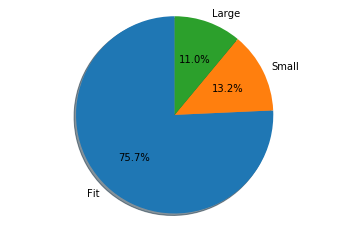

In [31]:
print("Fit   %:", ((reviews[reviews.fit == 'fit'].shape[0]) / (len(reviews.index))))
print("Small %:", ((reviews[reviews.fit == 'small'].shape[0]) / (len(reviews.index))))
print("Large %:", ((reviews[reviews.fit == 'large'].shape[0]) / (len(reviews.index))))

sizes = [reviews[reviews.fit == 'fit'].shape[0], reviews[reviews.fit == 'small'].shape[0], reviews[reviews.fit == 'large'].shape[0]]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

More information is gained simply by guessing "fit" on every item, so these models provide us no additional information.

In [32]:
import numpy as np
rfImportances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns =['importance']).sort_values('importance', ascending=False)
gbImportances = pd.DataFrame(gb.feature_importances_, index = X_train.columns, columns =['importance']).sort_values('importance', ascending=False)
rfImportances

,importance
user_id,0.180196
item_id,0.175584
age,0.127741
weight,0.113313
height,0.095307
size,0.064226
body_type,0.056110
rented_for,0.055091
bust_volume,0.052132
bust_height,0.049837


In [33]:
gbImportances

,importance
item_id,0.374552
size,0.290323
weight,0.178456
category,0.088066
user_id,0.016347
age,0.014305
bust_volume,0.013664
body_type,0.010897
height,0.007348
rented_for,0.003900


In [34]:
from sklearn.utils import resample
def resample_data(df):
    # Separate majority and minority classes
    df_majority = df[df.fit=='fit']
    df_minority_1 = df[df.fit=='small']
    df_minority_2 = df[df.fit=='large']

    size = df_majority.shape[0]
    
    # Upsample minority class
    df_minority_1_upsampled = resample(df_minority_1, 
                                     replace=True,     # sample with replacement
                                     n_samples=size,    # to match majority class
                                     random_state=123) # reproducible results
    
    df_minority_2_upsampled = resample(df_minority_2, 
                                     replace=True,     # sample with replacement
                                     n_samples=size,    # to match majority class
                                     random_state=123) # reproducible results
    # # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled]).sample(frac=1)

    return df_upsampled

In [35]:
X_train['fit'] = Y_train.values
X_test['fit'] = Y_test.values

In [36]:
X_train_resampled = resample_data(X_train)
X_test_resampled = resample_data(X_test)

In [37]:
Y_train_resampled = X_train_resampled['fit']
Y_test_resampled = X_test_resampled['fit']
X_train_resampled = X_train_resampled.drop(['fit'],axis = 1)
X_test_resampled = X_test_resampled.drop(['fit'], axis = 1)

In [38]:
def fit_to_int(x):
    if x == 'fit':
        return 0
    elif x == 'large':
        return 1
    return -1
Y_train_resampled = Y_train_resampled.map(fit_to_int)
Y_test_resampled = Y_test_resampled.map(fit_to_int)

### Display the Resampled Data

In [39]:
X_train_resampled.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
113764,42,2,45,63.0,1172052,7,45,974645,220,1000,5
70659,31,5,45,63.0,136860,7,8,678392,127,480,3
141899,20,1,16,61.0,730008,2,16,110773,135,710,4
50674,21,3,16,70.0,180843,2,16,197786,150,390,2
21849,26,3,16,65.0,932347,7,8,115282,135,240,0


In [40]:
X_test_resampled.head()

,age,body_type,category,height,item_id,rented_for,size,user_id,weight,bust_volume,bust_height
55452,28,3,20,65.0,139086,7,8,889975,128,390,2
132239,28,1,46,66.0,184374,7,1,958965,117,390,3
72991,60,6,20,67.0,125564,2,24,112054,141,710,4
40399,40,1,20,64.0,1615177,7,8,868837,120,480,3
64295,31,2,16,62.0,1090064,7,20,462617,160,590,4


In [41]:
Y_train_resampled.head()

113764    1
70659     0
141899    0
50674     0
21849    -1
Name: fit, dtype: int64

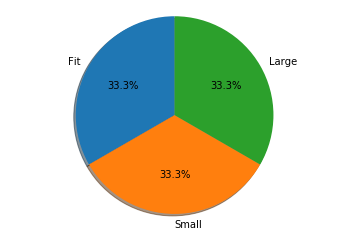

In [42]:
ytr = list(Y_train_resampled)
sizes = [len([x for x in ytr if x == 0]), len([x for x in ytr if x == -1]), len([x for x in ytr if x == 1])]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [43]:
Y_test_resampled.head()

55452    -1
132239    1
72991     1
40399    -1
64295     1
Name: fit, dtype: int64

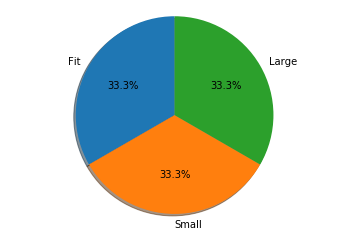

In [44]:
ytr = list(Y_test_resampled)
sizes = [len([x for x in ytr if x == 0]), len([x for x in ytr if x == -1]), len([x for x in ytr if x == 1])]
labels = ["Fit", "Small", "Large"]
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Classifier Models on Resampled Data:
- Random Forest (10 estimators)
- Random Forest (100 estimators)
- Gradient Boosting
- Neural Network: Multilayer Perceptron

In [45]:
# Create classifers
rf10 = RandomForestClassifier(n_estimators=10)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier()
nn = MLPClassifier()

# Train Classifers
rf10 = rf10.fit(X_train_resampled, Y_train_resampled)
rf = rf.fit(X_train_resampled, Y_train_resampled)
gb = gb.fit(X_train_resampled, Y_train_resampled)
nn = nn.fit(X_train_resampled, Y_train_resampled)

#Predict the response for test dataset
rf10_y_pred = rf10.predict(X_test_resampled)
rf_y_pred = rf.predict(X_test_resampled)
gb_y_pred = gb.predict(X_test_resampled)
nn_y_pred = nn.predict(X_test_resampled)

print("Random Forest:")
print("10 estimators Training Accuracy:", metrics.accuracy_score(Y_train_resampled, rf10.predict(X_train_resampled)))
print("10 estimators Test Accuracy:",metrics.accuracy_score(Y_test_resampled, rf10_y_pred))
print("100 estimators Training Accuracy:", metrics.accuracy_score(Y_train_resampled, rf.predict(X_train_resampled)))
print("100 estimators Test Accuracy:",metrics.accuracy_score(Y_test_resampled, rf_y_pred))

print("\nGradient Boosting:")
print("Training Accuracy:", metrics.accuracy_score(Y_train_resampled, gb.predict(X_train_resampled)))
print("Test Accuracy:",metrics.accuracy_score(Y_test_resampled, gb_y_pred))

print("\nNeural Network:")
print("Training Accuracy:", metrics.accuracy_score(Y_train_resampled, nn.predict(X_train_resampled)))
print("Test Accuracy:",metrics.accuracy_score(Y_test_resampled, nn_y_pred))

Random Forest:
10 estimators Training Accuracy: 0.9991881259733263
10 estimators Test Accuracy: 0.41057956865181505
100 estimators Training Accuracy: 0.9999926193270302
100 estimators Test Accuracy: 0.40126031774207865

Gradient Boosting:
Training Accuracy: 0.5651824133324477
Test Accuracy: 0.5501612378332003

Neural Network:
Training Accuracy: 0.36921816531231316
Test Accuracy: 0.3746043016478802


On the resample: Even thirds, 33% small, 33% fit, 33% large
Gradient Boosting here is 50% more accurate than random guessing

In [46]:
#Y_test_resampled.head()
a = pd.DataFrame(Y_test_resampled)
print(a.head())

print( (len(a[a['fit'] == 0])) / (len(a.index))  )

        fit
55452    -1
132239    1
72991     1
40399    -1
64295     1
0.3333333333333333


In [47]:
import numpy as np

rfImportances = pd.DataFrame(rf.feature_importances_, index = X_train_resampled.columns, columns =['importance']).sort_values('importance', ascending=False)
gbImportances = pd.DataFrame(gb.feature_importances_, index = X_train_resampled.columns, columns =['importance']).sort_values('importance', ascending=False)
rfImportances

,importance
item_id,0.185372
user_id,0.159984
age,0.119781
weight,0.111323
size,0.100556
height,0.089085
body_type,0.053093
rented_for,0.049991
bust_volume,0.047925
bust_height,0.045618


In [48]:
gbImportances

,importance
size,0.395129
item_id,0.323866
weight,0.171004
category,0.055847
body_type,0.012995
bust_volume,0.011001
user_id,0.009927
age,0.008788
rented_for,0.005600
height,0.004760
